### Examen Final

In [95]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px

from scipy import stats
from summarytools import dfSummary
from sklearn.preprocessing import power_transform
from sklearn.cluster import KMeans

In [96]:
data = pd.read_csv('BankChurners.csv')

In [97]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [98]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CLIENTNUM[int64],Mean (sd) : 739177606.3 (36903783.5)min < med < max:708082083.0 < 717926358.0 < 828343083.0IQR (CV) : 60106762.5 (20.0),"10,127 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC40lEQVR4nO3YsW7aUBSA4XMhQdcQ7hUhJVuWbonUASkLD9AxD5tH6MDQtRm6MGWJUBAyjYOFZdyhTdWqCuBrEDnk/2aObVm/uAdMURQCvHW1fT8AsImjdR8wxkQi0gi8/qIoinngLPDHylCNMVG3271xznVCLj6bzabGmFtiRVXrvlEbzrnOYDCYe+/TMheO49gOh8POZDJpiAihopK1R7+IiPc+7fV6zwHXjwJmgP/wYwoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQ4WjfD3CIjDGRiDQCxxdFUcy3+TyHgFC3zBgTdbvdG+dcJ2R+NptNjTG3xPovQt2+hnOuMxgM5t77tMxgHMd2OBx2JpNJQ0QI9S87DTXP82MRccaY0EuoPQa992mv13suO5fnuZN3+s5W2VmoSZIcZ1n26eLiol6v10t9s7x4b8cg7+x1Owt1sVgcWWub/X4/PT8/n5adf4/HIO/sdTvfUVutVtAR+Fu01YdRYl/vrOK/FSK//u5cBs6uXFn4MXVgKvwusKenp5+9963Q+yZJ8vHk5GRUq9WysvPrVhZCPSBVdtwsy6yIXF1fX389Ozublb33/f195+7u7kO/3/9edm3ZZGUh1FdUOAbdcrk83vbzbKLKjvs7tKa1NgtZO6bTaSRSaW1ZubK86VAr/r1VZV8KPgazLLN5nl+lafpFREL3zEpCYnkJ7a3aKNQ4jm3ZCz89PVkRkSRJ7Hg8bpadf3h4aIceY1X3pZdj8PLy8lu73f5RZvbx8dGORqNmHMet8Xi8KDNb9Z1Vmd/nvTfp6yeJ80MUZUbkNQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Attrition_Flag[object],1. Existing Customer2. Attrited Customer,"8,500 (83.9%)1,627 (16.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABMUlEQVR4nO3bQWrDMBRF0adiQjORMAYvxovoYrsI7cYYa9CETNRByRL+swr3bOAHchNI8Eu9dwEOSdJd0u3qF4LLvXrvj8gD07IsXznnOfIIxtdaO1JK35HBTTnnedu2RynlGXUEYzvP87PWOu/7fpMUF5sklVKe67r+RB3Bv3CPPvARfQB4IzbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwWaS/h6eu/qF4Dqu939qrR211lmGh+cwrtbaIekVeYPBC97CBy+JKR9cXN9s4Z8ajM8y5XPMxDC+8CmfayaG8bmmfPzSBX/qwofYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAab8CkfM0G8WaZ8jpkYxsfgBTa/Cltq33c4jS0AAAAASUVORK5CYII="">",0(0.0%)
3,Customer_Age[int64],Mean (sd) : 46.3 (8.0)min < med < max:26.0 < 46.0 < 73.0IQR (CV) : 11.0 (5.8),45 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3dPY7aQBiH8f+EDxmQbCEk6LhApBSUHCKHzRFScAJuQIe0QiC862CMU6SKBLvgj915h+fXT9bFI2RPxq9dWZYCfPftqy8AuEf3qy/AV865gaR+xeWnsizfmryeZ0eoVzjnBpPJ5Gccx+Mq6w+Hw84594tYm0Oo1/XjOB4vl8u3JEmyRxbu9/totVqNX15e+pIItSGE+o4kSbLpdPpaYemg8Yt5cjxMwQRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJ/BdqC4qi6EmKnXNVlnPy6gpCbViapr08z3/M5/NOp9N56ECLxMmrWwi1YafTqRtF0XCxWGSz2Wz3yFpOXt1GqC0ZjUacvGpQsKHWPKEfXy6XXpPXg3qCDLXuCf08z6OiKL5nWfZbUpVfRTQsyFBV44S+JG02m/F6vR6ez+dOGxeHx4UaqqTqJ/R3ux33iZ5hwx8mECpMIFSYQKgwweuHqRp7oeyDBsbbUOvshbIPGh5vQ1WNvVD2QcPjc6iSqu2Fsg8aHh6mYAKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTvD+U8mxqzq2SAp1dRageqTu3Sgp3dhWheqTO3Cop7NlVhOqhGnOrpEBnV/EwBRMIFSYQKkxo9R6V0Y9oSmuhMvoRTWrzF5XRj2hM69tTjH78XKF+kYV91ICE/EUWQg1IyF9kIdQAhfhFFvZRYQKhwgRChQmEChM+fJhi6jN88G6oTH2GLz76RWXqM7xw1z4qU5+fg88vFrLhD0n+v1hIqJDk/4uFhIr/+Ppi4V2h7vf76NF/+Hg8RpKUpmm03W6Hn7ne6t+2et3Sv0aKouiq+j3un7Isb95y/AUcdZM5QwCg9AAAAABJRU5ErkJggg=="">",0(0.0%)
4,Gender[object],1. F2. M,"5,358 (52.9%)4,769 (47.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABO0lEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa5CETJRBx8GCiie7vWcFH3MxJPi5UooBCs7MrmZ26X3IH/Aspdx7H3FkfhzHrxDC0PuQs8s5r865b4J7z4cQhnme7zHGR+9jzmrbts+U0rAsy8XMiO0Nb2YWY3xM03TrfczJXXsfcHQfvQ/A/0FskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoOMN/v5+K/3IWfG86vjc85rSmkwPv77lZzzambP3nccGYOXdh

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Customer_Age', ylabel='Count'>

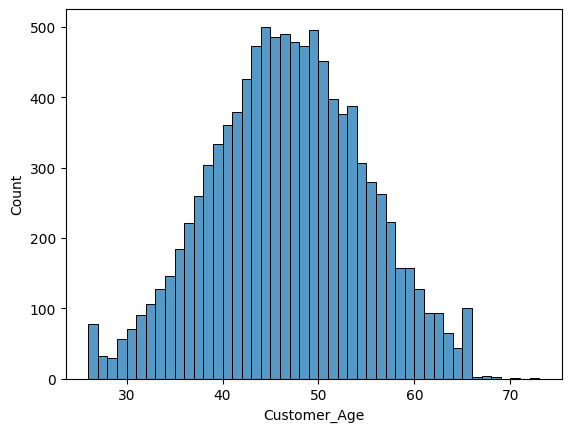

In [99]:
sns.histplot(data = data, x='Customer_Age')

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Credit_Limit', ylabel='Count'>

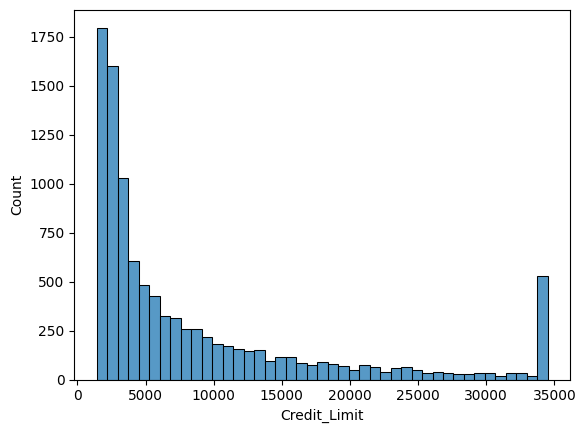

In [100]:
sns.histplot(data = data, x='Credit_Limit')

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Total_Trans_Ct', ylabel='Count'>

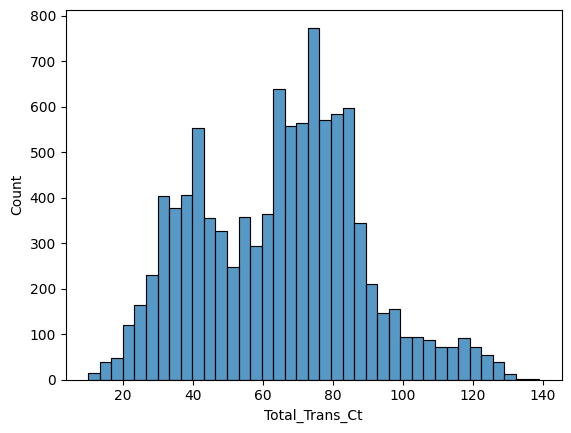

In [101]:
sns.histplot(data = data, x='Total_Trans_Ct')

In [102]:
data_evaluar = data[['Customer_Age','Credit_Limit','Total_Trans_Ct']]
data_evaluar

,Customer_Age,Credit_Limit,Total_Trans_Ct
0,45,12691.0,42
1,49,8256.0,33
2,51,3418.0,20
3,40,3313.0,20
4,40,4716.0,28
...,...,...,...
10122,50,4003.0,117
10123,41,4277.0,69
10124,44,5409.0,60
10125,30,5281.0,62


In [103]:
dfSummary(data_evaluar)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Customer_Age[int64],Mean (sd) : 46.3 (8.0)min < med < max:26.0 < 46.0 < 73.0IQR (CV) : 11.0 (5.8),45 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3dPY7aQBiH8f+EDxmQbCEk6LhApBSUHCKHzRFScAJuQIe0QiC862CMU6SKBLvgj915h+fXT9bFI2RPxq9dWZYCfPftqy8AuEf3qy/AV865gaR+xeWnsizfmryeZ0eoVzjnBpPJ5Gccx+Mq6w+Hw84594tYm0Oo1/XjOB4vl8u3JEmyRxbu9/totVqNX15e+pIItSGE+o4kSbLpdPpaYemg8Yt5cjxMwQRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJ/BdqC4qi6EmKnXNVlnPy6gpCbViapr08z3/M5/NOp9N56ECLxMmrWwi1YafTqRtF0XCxWGSz2Wz3yFpOXt1GqC0ZjUacvGpQsKHWPKEfXy6XXpPXg3qCDLXuCf08z6OiKL5nWfZbUpVfRTQsyFBV44S+JG02m/F6vR6ez+dOGxeHx4UaqqTqJ/R3ux33iZ5hwx8mECpMIFSYQKgwweuHqRp7oeyDBsbbUOvshbIPGh5vQ1WNvVD2QcPjc6iSqu2Fsg8aHh6mYAKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTvD+U8mxqzq2SAp1dRageqTu3Sgp3dhWheqTO3Cop7NlVhOqhGnOrpEBnV/EwBRMIFSYQKkxo9R6V0Y9oSmuhMvoRTWrzF5XRj2hM69tTjH78XKF+kYV91ICE/EUWQg1IyF9kIdQAhfhFFvZRYQKhwgRChQmEChM+fJhi6jN88G6oTH2GLz76RWXqM7xw1z4qU5+fg88vFrLhD0n+v1hIqJDk/4uFhIr/+Ppi4V2h7vf76NF/+Hg8RpKUpmm03W6Hn7ne6t+2et3Sv0aKouiq+j3un7Isb95y/AUcdZM5QwCg9AAAAABJRU5ErkJggg=="">",0(0.0%)
2,Credit_Limit[float64],Mean (sd) : 8632.0 (9088.8)min < med < max:1438.3 < 4549.0 < 34516.0IQR (CV) : 8512.5 (0.9),"6,205 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC30lEQVR4nO3dv27aUBSA8XMgIBvSaxAt2Vg6MFTqkJGlb5CHzdqtA3kKhm4RCiJGOHGxDF1Kl7aAr8uf43y/OecaWZ/Avo5k3Ww2Aly62rk/AHCIq31/oKqhiDQ9119tNptXz1ngt52hqmrY6/XunHNdn8UXi8VcVe+JFWXt+0ZtOue6o9HoNYqitMjCcRwH4/G4O5vNmiJCqChl70+/iEgURWm/33/xWD/0mAH+wM0UTCBUmECoMIFQYQKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTCBUmECpMIFSYQKgwgVBhAqHCBEKFCYQKEwgVJhAqTCBUmECoMIFQYQKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTCBUmECpMIFSYQKgwgVBhwkEv7fWV53lDRJyq+i6x4hXqEDliqEmSNLIs+zwYDOr1er3QK9S3FovFXFXviRVHC3W1Wl0FQdC6vb1Nb25u5kXn4zgOxuNxdzabNUWEUN+4o/70i4i02+203++/eI6H//XDwCxupmACocIEQoUJR79GLaPk9hZbWxVysaGW3d5ia6taLjbUMttbbG1Vz8WGulVie4utrQq5+FB98fj29FQ1FJGm5/jO813JUHl8e3qqGvZ6vTvnXNdnft/5rmSoPL49i6ZzrjsajV6jKCr05XDI+a5kqFtlHt/mee6ErbHCoig6yj1FpUP1VfbS4fn5eamqX0XE57LjzUa+C6H+RZlLh8fHx3cPDw9fBoPB+zNELlLR0Al1B59Lh/l8Hp4rcpHSoddEZO1zXBFx6/W64Tm7F6EeyakjFykXep7njSRJPl5fX09qtVpW9NhZlgV5nn9K0/SbiPj+W+c/HRRqHMdB0YWXy2UgIpIkSTCdTlunnLd67O2sryzLroIgaA2HQ+10Oj+KzD49PQWTyeTDcDj83ul0lkWP/Wu+FcdxezqdrorMHtLXT7+FbuoZCd0oAAAAAElFTkSuQmCC"">",0(0.0%)
3,Total_Trans_Ct[int64],Mean (sd) : 64.9 (23.5)min < med < max:10.0 < 67.0 < 139.0IQR (CV) : 36.0 (2.8),126 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACx0lEQVR4nO3cy4oaQRSA4VNxlFJJN17QnS8wkIUwm3mALPOweYQILrL2DdyIINKiGbG9ZJExzMBkZrqqO1On+L990bX4Ecs+lrlcLgKE7tNHbwB4j5uP3kCMjDFNEWk4Lj9cLpeHMvcTA0L9B4/YbLfb/ZqmadvluZvNZm2M+U6szxHqC4wxzV6v9y1Jkk7RtXmeWxG5vbu7+9nv9zdF1mZZZqfTaWe1WjVEhFCfINSXNZIk6dzf3z+kabovsnA+n3dms1nLWpsPBoNfDs9uOqyJHqG+Ik3TfdHY1us1oVWAUz9UIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQpBj/nxlw5cBRuqz5S9CH/piE2woYrHlD1/6YhPyKGKiNuU/SMm7SPCYQoqECpUIFSoQKhQgVChAqFCBUKFCoQKFYL/wd/V6XSqi0hijHFZnpzP53rJW4KHKEPd7Xb1PM+/jEajWq1WK/T6VeTPjXyn0+l2v9//EBGXt2IoWZShHg6HG2ttazwe74fD4bro+uuNfMfjsVbF/lBclKFetdttpzkBbuQLD4cpqFDpJ6rn4DMHGvxVWai+g88caPBUlZ+ozoPPIhxo8FzlhynXwWcONHiKwxRUIFSoQKhQgVChAqFChahfoWrkOfUlEukNMYQaEN+pL5F4b4gh1ID4Tn3FfEMMoQbIderrUZQvSjhMQQVChQqEChUIFSoQKlQgVKhAqFCBUKECP/hHxnNWINg5AUKNiO+sQMhzAoQaEZ9ZgSzL7GQyGaxWq74xZuO6haoiJ9QIucwKhD65RagQkfAnt94M1eO2E246USjUya1XQ/W57YSbTlCmtz5RnW874aYTlOld31FdbjvhphOUicMUSlPly4Z3hZplmS361O12a0VEdrudXS6Xrf+5Xuuzte5bRGSxWHyu8mXDbwFOjsgpuIQHAAAAAElFTkSuQmCC"">",0(0.0%)


In [104]:
data_evaluar.describe()

,Customer_Age,Credit_Limit,Total_Trans_Ct
count,10127.000000,10127.000000,10127.000000
mean,46.325960,8631.953698,64.858695
std,8.016814,9088.776650,23.472570
min,26.000000,1438.300000,10.000000
25%,41.000000,2555.000000,45.000000
50%,46.000000,4549.000000,67.000000
75%,52.000000,11067.500000,81.000000
max,73.000000,34516.000000,139.000000


<Axes: >

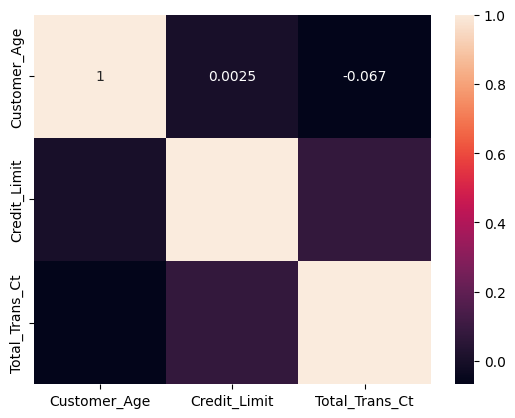

In [105]:
sns.heatmap(data_evaluar[['Customer_Age','Credit_Limit','Total_Trans_Ct']].corr(),annot=True)

In [106]:
columnas = data_evaluar.columns

In [107]:
def detectOutlierLimits(dataset, col):
    IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
    LI = dataset[col].quantile(0.25) - (IQR*1.75)
    LS = dataset[col].quantile(0.75) + (IQR*1.75)

    return LI, LS

In [108]:
LI, LS = detectOutlierLimits(data_evaluar,columnas)
LI, LS

(Customer_Age         21.750
 Credit_Limit     -12341.875
 Total_Trans_Ct      -18.000
 dtype: float64,
 Customer_Age         71.250
 Credit_Limit      25964.375
 Total_Trans_Ct      144.000
 dtype: float64)

In [109]:
data_evaluar = np.where(data_evaluar[columnas] > LS, LS, 
                                        np.where(data_evaluar[columnas] < LI, LI, data_evaluar[columnas]))

In [110]:
column_names = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Ct']
Data_final = pd.DataFrame(data_evaluar, columns=column_names)

In [111]:
Data_final

,Customer_Age,Credit_Limit,Total_Trans_Ct
0,45.0,12691.0,42.0
1,49.0,8256.0,33.0
2,51.0,3418.0,20.0
3,40.0,3313.0,20.0
4,40.0,4716.0,28.0
...,...,...,...
10122,50.0,4003.0,117.0
10123,41.0,4277.0,69.0
10124,44.0,5409.0,60.0
10125,30.0,5281.0,62.0


c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Customer_Age', ylabel='Count'>

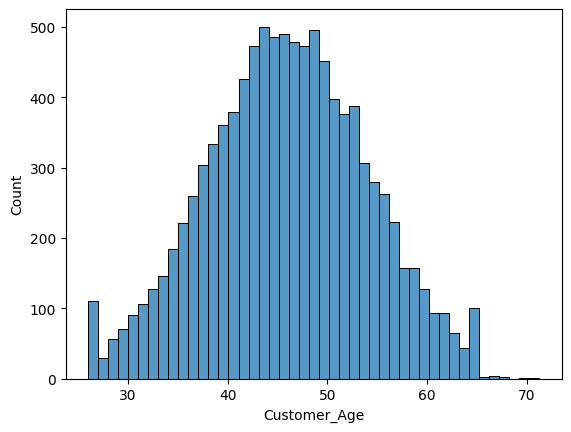

In [112]:
sns.histplot(data = Data_final, x='Customer_Age')

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Credit_Limit', ylabel='Count'>

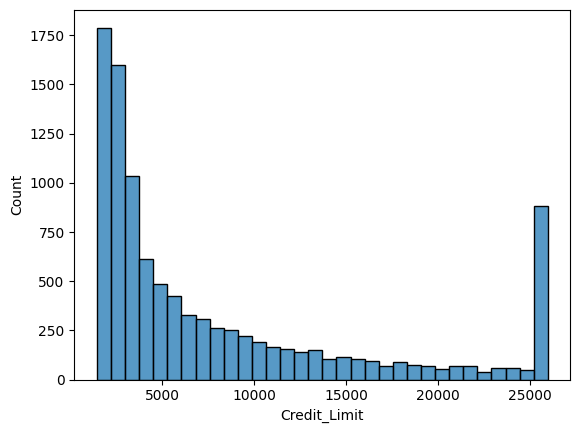

In [113]:
sns.histplot(data = Data_final, x='Credit_Limit')

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Total_Trans_Ct', ylabel='Count'>

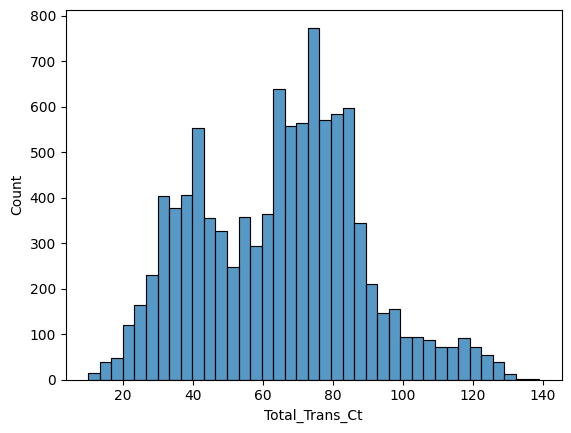

In [114]:
sns.histplot(data = Data_final, x='Total_Trans_Ct')

In [115]:
lambdas = []
nombre = []
df_new = pd.DataFrame()

for x in Data_final.columns:
    df, lamb = stats.boxcox(Data_final[x])
    lambdas.append(lamb)
    nombre.append(x)
    df_new[x] = df

In [116]:
df_lambdas = {
    'nombre' : nombre,
    'lambda' : lambdas
}

df_lambdas = pd.DataFrame(df_lambdas)
df_lambdas

,nombre,lambda
0,Customer_Age,1.033693
1,Credit_Limit,-0.244715
2,Total_Trans_Ct,0.754418


In [117]:
df_new.describe()

,Customer_Age,Credit_Limit,Total_Trans_Ct
count,10127.000000,10127.000000,10127.000000
mean,50.058085,3.574493,29.134641
std,9.117112,0.107873,8.536107
min,27.103477,3.396834,6.204662
25%,43.982763,3.487284,22.095229
50%,49.660394,3.566158,30.298070
75%,56.500920,3.667881,35.165240
max,78.615280,3.746701,53.516866


c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Customer_Age', ylabel='Count'>

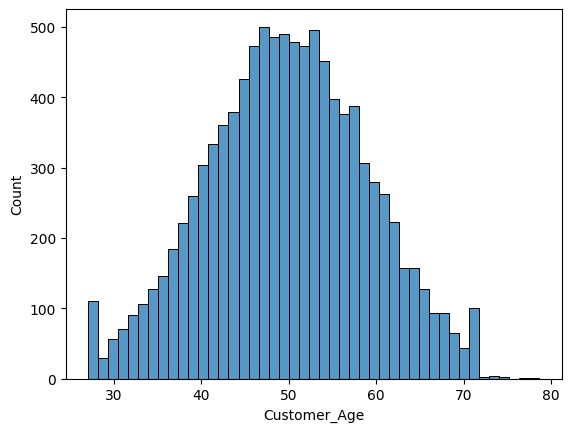

In [118]:
sns.histplot(df_new,x= 'Customer_Age')

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Credit_Limit', ylabel='Count'>

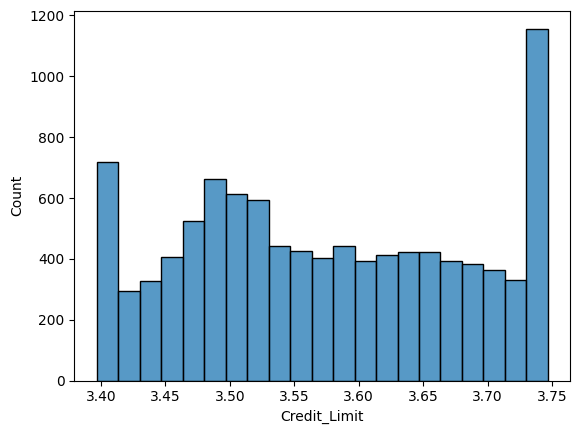

In [119]:
sns.histplot(df_new,x= 'Credit_Limit')

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Total_Trans_Ct', ylabel='Count'>

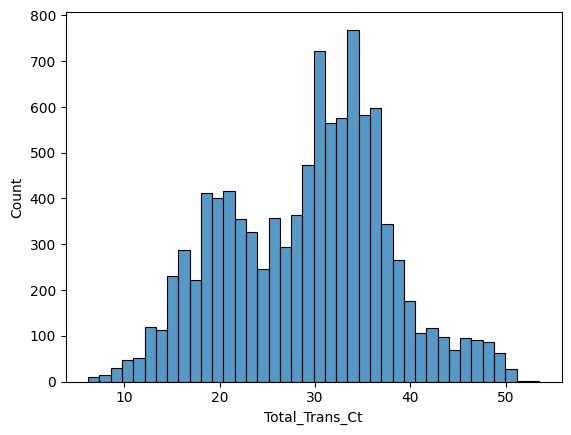

In [120]:
sns.histplot(df_new,x= 'Total_Trans_Ct')

In [121]:
inercia = []
ks = []

for k in range(1,60):
    modelo_iterado = KMeans(n_clusters = k, random_state = 5)
    modelo_iterado.fit(df_new)
    inercia.append(modelo_iterado.inertia_)
    ks.append(k)

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-pac

In [122]:
codo = {
    'inercia': inercia,
    'k': ks
}
codo = pd.DataFrame(codo)


c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:



<Axes: xlabel='k', ylabel='inercia'>

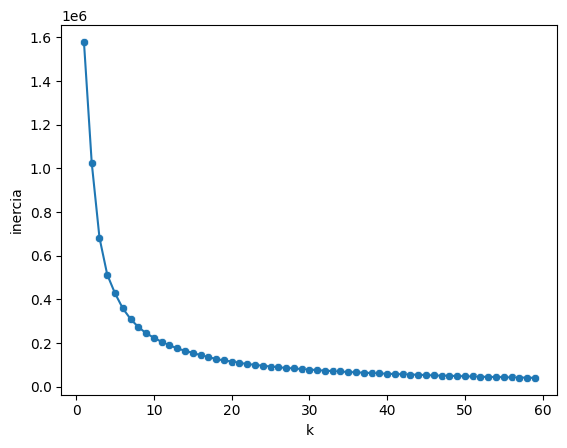

In [123]:
sns.scatterplot(data=codo,x='k',y='inercia',markers=True)
sns.lineplot(data=codo, x='k', y='inercia',)

In [124]:
modelo = KMeans(n_clusters=3,random_state = 10)
modelo.fit(df_new)

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=10)

In [125]:
Data_final['cluster'] = modelo.labels_
Data_final

,Customer_Age,Credit_Limit,Total_Trans_Ct,cluster
0,45.0,12691.0,42.0,2
1,49.0,8256.0,33.0,2
2,51.0,3418.0,20.0,2
3,40.0,3313.0,20.0,2
4,40.0,4716.0,28.0,0
...,...,...,...,...
10122,50.0,4003.0,117.0,1
10123,41.0,4277.0,69.0,0
10124,44.0,5409.0,60.0,0
10125,30.0,5281.0,62.0,0


In [126]:
Data_final.groupby(by='cluster').count()

,Customer_Age,Credit_Limit,Total_Trans_Ct
cluster,,,
0,3385,3385,3385
1,4116,4116,4116
2,2626,2626,2626


In [127]:
df_new.describe()

,Customer_Age,Credit_Limit,Total_Trans_Ct
count,10127.000000,10127.000000,10127.000000
mean,50.058085,3.574493,29.134641
std,9.117112,0.107873,8.536107
min,27.103477,3.396834,6.204662
25%,43.982763,3.487284,22.095229
50%,49.660394,3.566158,30.298070
75%,56.500920,3.667881,35.165240
max,78.615280,3.746701,53.516866


In [128]:
Data_final.describe()

,Customer_Age,Credit_Limit,Total_Trans_Ct,cluster
count,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325787,8071.984581,64.858695,0.925052
std,8.016258,7648.335063,23.472570,0.766813
min,26.000000,1438.300000,10.000000,0.000000
25%,41.000000,2555.000000,45.000000,0.000000
50%,46.000000,4549.000000,67.000000,1.000000
75%,52.000000,11067.500000,81.000000,2.000000
max,71.250000,25964.375000,139.000000,2.000000


In [129]:
Data_final.groupby(by='cluster').agg(['min','mean','max'])

Customer_Age                   Credit_Limit                          \
                 min       mean    max          min         mean        max   
cluster                                                                       
0               26.0  37.791728  46.00       1438.3  7622.813235  25964.375   
1               37.0  49.793246  65.00       1438.3  8315.693950  25964.375   
2               37.0  51.891565  71.25       1438.3  8268.990385  25964.375   

        Total_Trans_Ct                    
                   min       mean    max  
cluster                                   
0                 10.0  63.644904  134.0  
1                 58.0  82.377065  139.0  
2                 10.0  38.964966   65.0

# Caracteristicas de clusters

* 0 -> Adulto joven      - Limite bajo - Transaccionalidad intermedia  B 
* 1 -> Adulto Intermedio - Limite alto - Transaccionalidad alta        A
* 2 -> Adulto Intermedio - Limite alto - Transaccionalidad baja        C

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='Customer_Age', ylabel='Credit_Limit'>

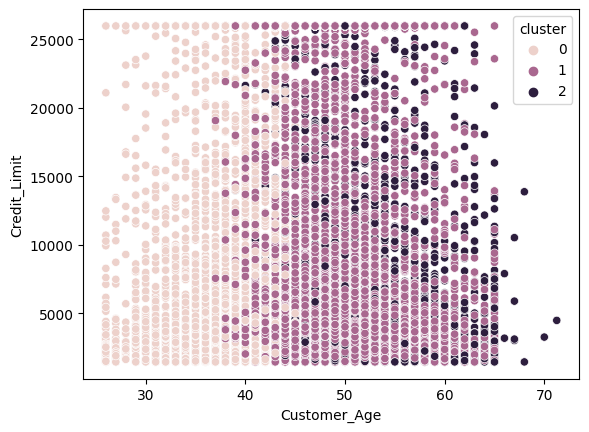

In [130]:
sns.scatterplot(data=Data_final,x='Customer_Age', y='Credit_Limit', hue='cluster')

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='Credit_Limit', ylabel='Total_Trans_Ct'>

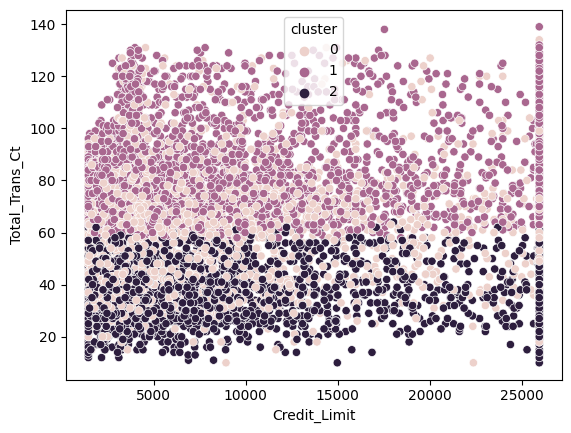

In [131]:
sns.scatterplot(data=Data_final,x='Credit_Limit', y='Total_Trans_Ct', hue='cluster')

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC2\anaconda3\envs\UltimaClase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='Credit_Limit', ylabel='Customer_Age'>

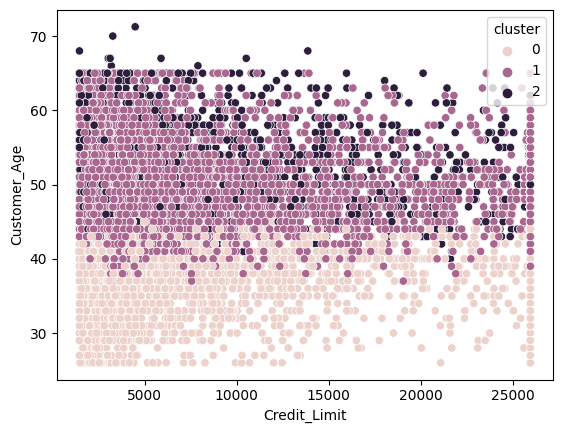

In [132]:
sns.scatterplot(data=Data_final,x='Credit_Limit', y='Customer_Age', hue='cluster')

In [133]:
fig = px.scatter_3d(Data_final, x = 'Total_Trans_Ct',
y = 'Credit_Limit',
z = 'Customer_Age',
color = 'cluster')

fig.show()